<a href="https://colab.research.google.com/github/pdhey/Prelim-Exam/blob/main/Prelim_Examination_GROUP_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MEMBERS: ANSELMO, JOSEPH DANIEL / QUIETA, PRINCESS

COURSE AND SECTION: CPE019-CPE32S5

INSTRUCTOR: ENGR. ROMAN RICHARD

Choose any dataset applicable for classification and/or prediction analysis problems.

Show the application of the following algorithms:

* Linear Regression
*Singular LR
*Multiple LR
*Polynomial LR
*Logistic Regression
*Decision Tree
*Random Forest
*Provide Evaluation reports for all models


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [ ]:
# Read the CSV file
df = pd.read_csv('/content/Automobile_data.csv')

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# DATA PLOTTING

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
df.keys()

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [ ]:
df.corr(method="pearson")

<ipython-input-8-430a9a400b0e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method="pearson")


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.178515,-0.035823,0.034606
wheel-base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.249786,-0.470414,-0.544082
length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.158414,-0.670909,-0.704662
width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.181129,-0.642704,-0.677218
height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.261214,-0.048640,-0.107358
curb-weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.151362,-0.757414,-0.797465
engine-size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.028971,-0.653658,-0.677470
compression-ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,1.000000,0.324701,0.265201
city-mpg,-0.035823,-0.470414,-0.670909,-0.642704,-0.048640,-0.757414,-0.653658,0.324701,1.000000,0.971337
highway-mpg,0.034606,-0.544082,-0.704662,-0.677218,-0.107358,-0.797465,-0.677470,0.265201,0.971337,1.000000


In [ ]:
df = df.dropna()

# LINEAR REGRESSION

# SINGULAR REGRESSION

In [ ]:
# data process
df.replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower', 'engine-size'], inplace=True)
df['horsepower'] = df['horsepower'].astype(float)

# data load
X = df[['horsepower']]
y = df['engine-size']

# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# loading and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)

# Model Performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
x = sm.add_constant(X)
results = sm.OLS(y,x).fit()
results.summary()


Mean Squared Error: 478.25601220046775
R-squared: 0.698257680282355


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            engine-size   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     385.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           1.24e-48
Time:                        08:57:06   Log-Likelihood:                -936.83
No. Observations:                 203   AIC:                             1878.
Df Residuals:                     201   BIC:                             1884.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.7938      4.852      7.789      0.000      28.227      47.361
horsepower     0.8543      0.044     19.637      0.000       0.768       0.940
==============================================================================
Omnibus:                       47.337   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.590
Skew:                           0.788   Prob(JB):                     5.64e-48
Kurtosis:                       7.821   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

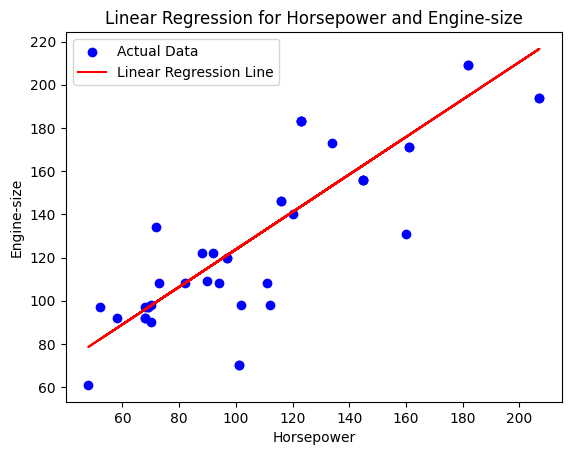

In [ ]:

#displaying the results
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression Line')
plt.xlabel('Horsepower')
plt.ylabel('Engine-size')
plt.title('Linear Regression for Horsepower and Engine-size')
plt.legend()
plt.show()

# EVALUATION REPORT


a. The Dataset observed the engine-size and horsepower to see which has a higher performance and engine comparison


b. With Higher engine-size it comes up with a higher horsepower can see the differences in the table.

c.The mean squared error is 478.25 and the R-squared is 0.69 a lower mean is good with performance and the r squared is equivalent to 69 percent measuring its dependent variable.

# Multiple LR

In [ ]:
X1 = df[['horsepower', 'width']]
y = df['engine-size']
width = df['width']
horsepower = df['horsepower']

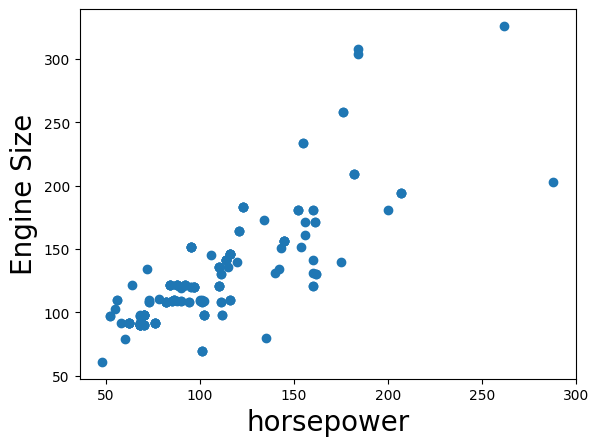

In [ ]:
plt.scatter(horsepower,y)
plt.xlabel('horsepower',fontsize=20)
plt.ylabel('Engine Size',fontsize=20)
plt.show()

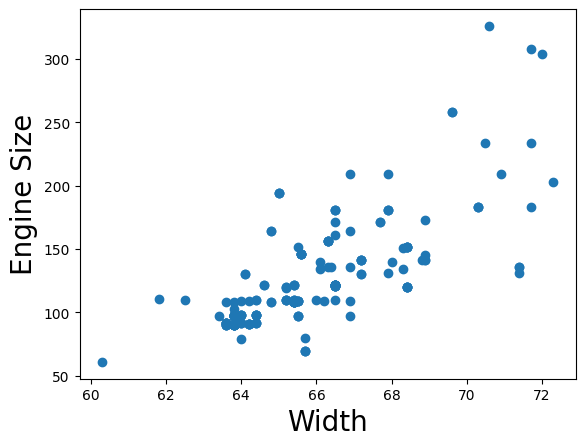

In [ ]:
plt.scatter(width,y)
plt.xlabel('Width',fontsize=20)
plt.ylabel('Engine Size',fontsize=20)
plt.show()

In [ ]:
df.corr(method='pearson')

x = sm.add_constant(X1)
results = sm.OLS(y,x).fit()
results.summary()

<ipython-input-15-2604492f5bdf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            engine-size   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     278.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):           1.60e-58
Time:                        08:57:22   Log-Likelihood:                -910.46
No. Observations:                 203   AIC:                             1827.
Df Residuals:                     200   BIC:                             1837.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -403.9946     57.517     -7.024      0.000    -517.411    -290.578
horsepower     0.6069      0.050     12.144      0.000       0.508       0.705
width          7.0951      0.921      7.702      0.000       5.279       8.911
==============================================================================
Omnibus:                       27.897   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.325
Skew:                           0.195   Prob(JB):                     1.87e-34
Kurtosis:                       7.267   Cond. No.                     4.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# EVALUATION REPORT

a. We come up with the table that will analyze the difference between engine size and horsepower, engine-size and width.

b. With multiple linear regression we can see and compare the differences between 2 to 1 or 3 to 1 subjects.

c. Some of the engine size are bigger and wider, mostly of the engine is big but with lower horsepower ratio.

# Polynomial LR

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


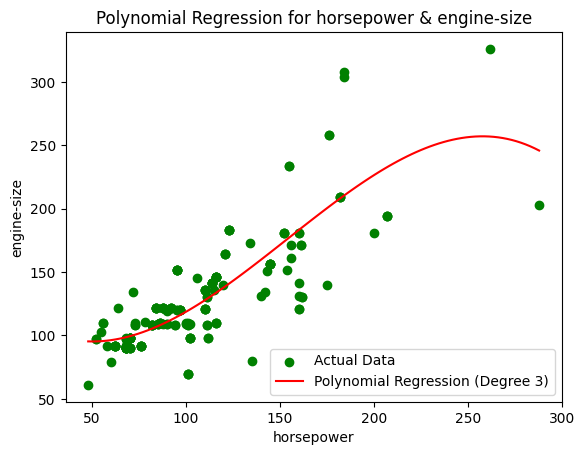

In [ ]:
# data load
X = df[['horsepower']]
y = df['engine-size']


# data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Polynomial Regression
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
linear_reg = LinearRegression()
linear_reg.fit(X_poly_train, y_train)


# displaying the results for polynomial regression
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = linear_reg.predict(X_range_poly)
plt.scatter(X, y, color='green', label='Actual Data')
plt.plot(X_range, y_range_pred, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('horsepower')
plt.ylabel('engine-size')
plt.title('Polynomial Regression for horsepower & engine-size')
plt.legend()
plt.show()

# EVALUATION REPORT FOR POLYNOMIAL LR

a. Polynomial regression is predicting the engine-size and it's horsepower if it is normal to its regression or not.

b. This cubic model measuring the exponential power and analyzing the relationship between the engine-size and horsepower

c. Most of the engine-size is met together with its horsepower matching with the same ratio by viewing or base on the polynomial regression.

# Logistic Regression

Accuracy: 75.61%
Confusion Matrix:
 [[14  5]
 [ 5 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74        19
           1       0.77      0.77      0.77        22

    accuracy                           0.76        41
   macro avg       0.75      0.75      0.75        41
weighted avg       0.76      0.76      0.76        41



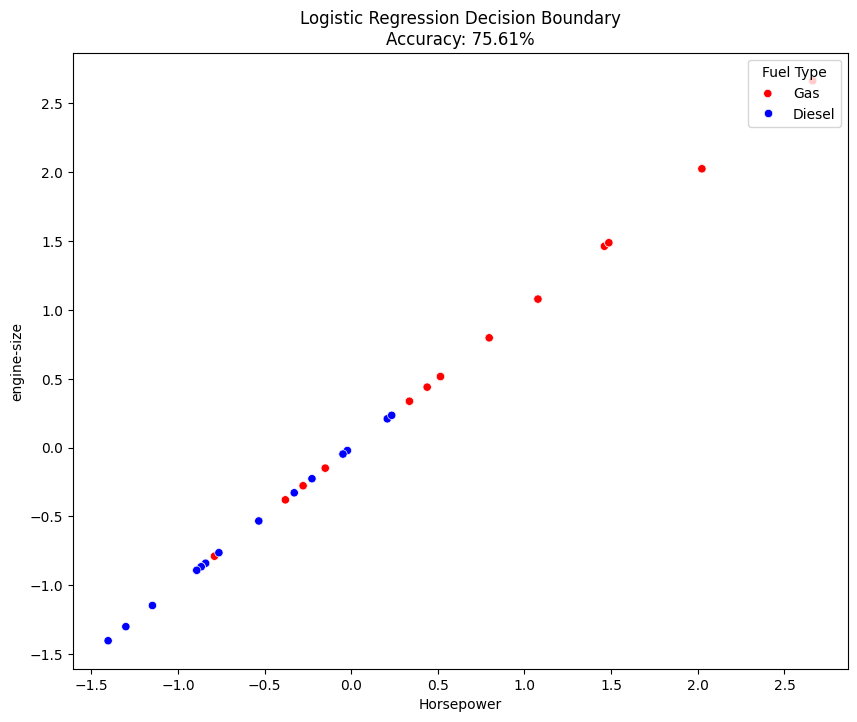

In [ ]:
y_binary = (y > np.median(y)).astype(int)


# data split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42)


# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# decision boundary displaying logistic regression
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 0], hue=y_test, palette={0: 'blue', 1: 'red'}, marker='o')
plt.xlabel("Horsepower")
plt.ylabel("engine-size")
plt.title("Logistic Regression Decision Boundary\nAccuracy: {:.2f}%".format(accuracy * 100))
plt.legend(title="Fuel Type", loc="upper right", labels=['Gas', 'Diesel'])
plt.show()







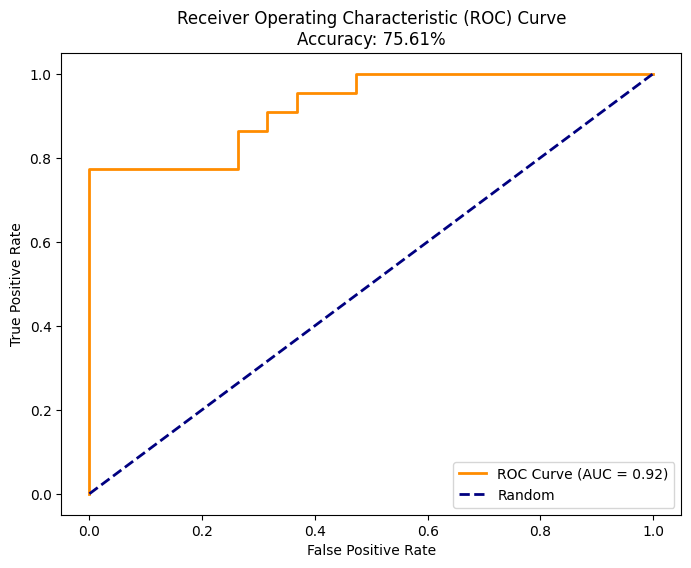

In [ ]:
# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()

# EVALUATION REPORT FOR LOGISTICS REGRESSION

a. We can able to see the type of gasoline that has been using for their automobiles.

b. When it comes to higher engine-size and horsepower it is mostly used of gasoline intake and diesel are for normal automobiles

c. We can compare the difference of gas and diesel that which can give the more performance rating.

d. With its ROC curve there are no negative rate that has been gathered and it improves more performance when it comes to engine-size.

# Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('horsepower',axis=1)
y = df['engine-size']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree.tree_.node_count, dtree.tree_.max_depth

(127, 13)

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          61       0.00      0.00      0.00         1
          70       1.00      1.00      1.00         1
          79       0.00      0.00      0.00         0
          90       1.00      1.00      1.00         3
          92       0.80      0.80      0.80         5
          97       0.80      1.00      0.89         4
          98       0.75      1.00      0.86         6
         108       1.00      1.00      1.00         2
         109       1.00      1.00      1.00         1
         110       0.80      1.00      0.89         4
         120       1.00      0.50      0.67         2
         121       1.00      1.00      1.00         1
         122       1.00      0.75      0.86         4
         130       0.00      0.00      0.00         2
         131       0.00      0.00      0.00         1
         134       0.00      0.00      0.00         2
         136       0.67      1.00      0.80         2
         141       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
from IPython.display import Image
from io import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(df.columns[:3])
features

['symboling', 'normalized-losses', 'make']

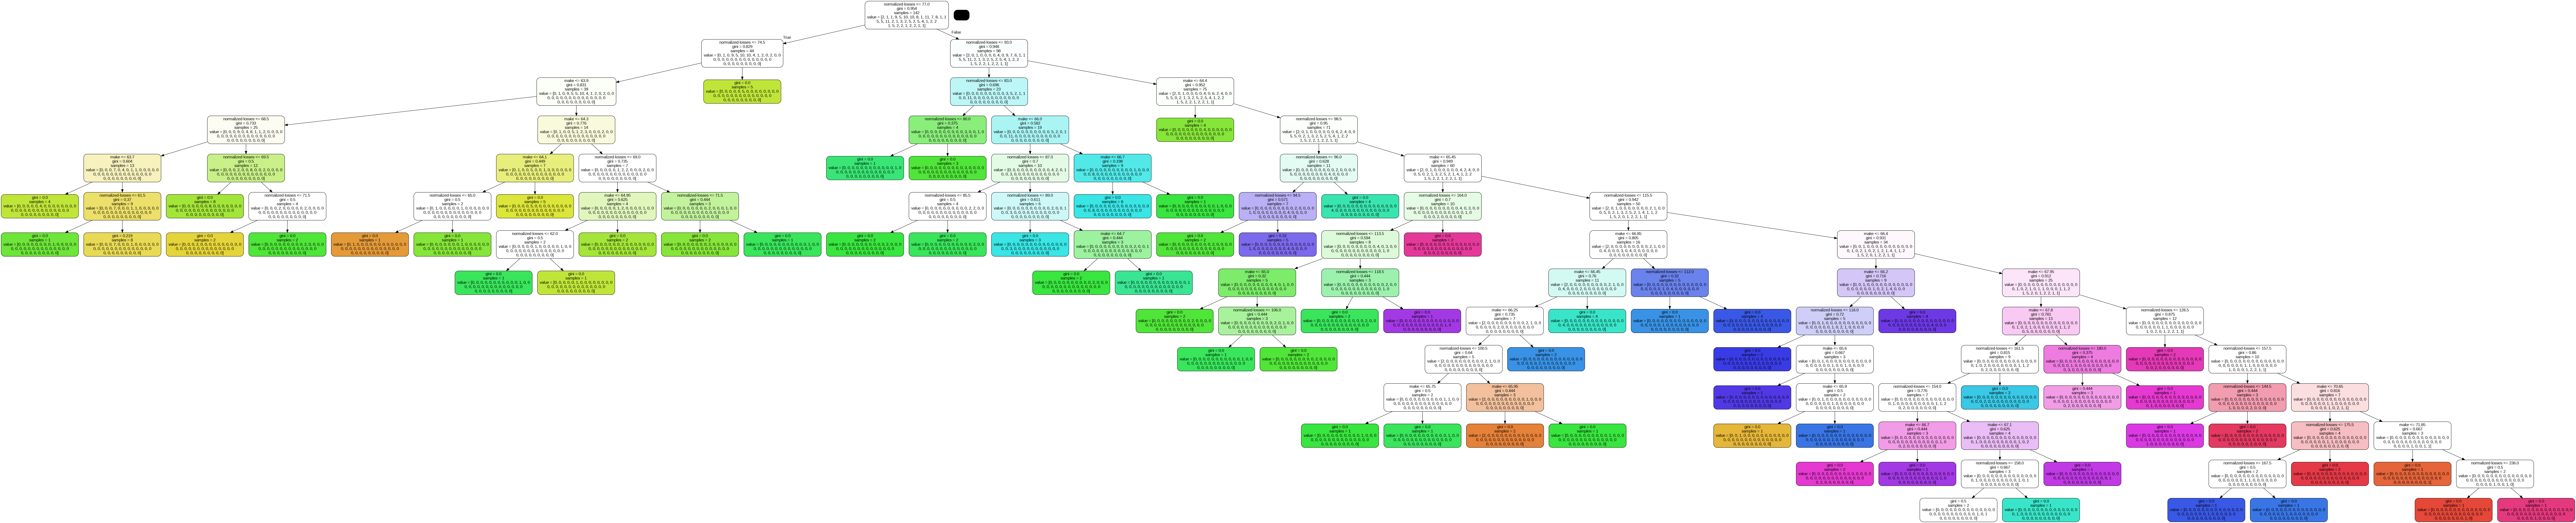

In [ ]:
from io import StringIO
from IPython.display import Image, display
import pydotplus

from sklearn.tree import export_graphviz
dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data, feature_names=features,filled=True,rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
filename = 'Automobile .png'
graph.write_png(filename)
img = Image(filename=filename)
display(img)

# EVALUATION REPORT FOR DECISION TREE

a. Decision tree applies the negative and positive effects for the engine-size and horse power

b. With its tree we can see the possible results by analyzing them in decision tree.

c. As of the image shown there are more results gained in false tree rather than true. And because of that there are a lot more data test and analyzation breakdown.

# Random Forest

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.10, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          61       0.00      0.00      0.00         1
          70       1.00      1.00      1.00         2
          90       1.00      1.00      1.00         1
          92       0.50      1.00      0.67         1
          97       1.00      0.50      0.67         2
          98       1.00      1.00      1.00         2
         108       1.00      1.00      1.00         2
         109       1.00      1.00      1.00         1
         110       0.00      0.00      0.00         0
         120       1.00      1.00      1.00         1
         122       0.00      0.00      0.00         0
         130       0.00      0.00      0.00         0
         131       0.00      0.00      0.00         1
         134       0.00      0.00      0.00         1
         141       0.00      0.00      0.00         0
         146       1.00      1.00      1.00         1
         171       0.00      0.00      0.00         2
         173       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.6190476190476191


# EVALUATION REPORT FOR RANDOM FOREST

a. In Random Forest result there are 61.9 percent of accuracy

b. Resulted of 61.9 percent is a good sign that it is passed and achieved the best engineered results and good perfomance automobiles.

# LINK OF DATASET

reference: https://github.com/rushabh-mehta/EDA-on-Automobile-Dataset/blob/master/Automobile_data.csv